<a href="https://colab.research.google.com/github/uddaloksarkar/ML-scratches/blob/main/Regression_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q.** Let’s say you want to buy a new flat and thus need to estimate a bank loan. You surveyed the newspapers for the price of 10 random flats spread across your city. However, the surveyed flat s are of different sizes having diverse range of essential amenities.Thus,you created the following Table1 listing the size of a flat,the number of bedrooms in that flat, and the corresponding price.You want to buy a flat which is about 950-1050sq.ft. in size having either 2 or 3 bedrooms.Estimate the upper and lower limit of the bankloan given the data in Table1.

In [ ]:
#preliminaries:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import ceil
from sklearn.model_selection import train_test_split

#import data:
x_raw = [[1600,1260,1800,600,850,920,1090,890,1340,1650],[3,2,4,1,2,2,2,2,3,2]]
y = [8.2, 6.6, 10.3, 1.7, 3.6, 4.4, 5.4, 4.8, 10.5, 7.4]
x, y = np.matrix(x_raw).T, np.matrix(y).T
n, d = x.shape[0], x.shape[1]
x = np.hstack((np.ones((n,1)),x)) #stacking 1's to handle bias
d += 1
x = x.astype(float)
x_est = [[950, 1050],[2,3]]   #x values of which targets to be estimated

#Feature Scaling (mean-std):
mean, std = [np.mean(x[:,dim]) for dim in range(d)], [np.std(x[:,dim]) for dim in range(d)]
feat_scaling = lambda a, dim: (a - mean[dim]) / std[dim]
for i in range(1,x.shape[1]):
  x[:,i] = feat_scaling(x[:,i], i)

print("Features:")
print(x,'\n')
print("targets:")
print(y)

Features:
[[ 1.          1.06343871  0.89625816]
 [ 1.          0.15951581 -0.38411064]
 [ 1.          1.59515807  2.17662696]
 [ 1.         -1.59515807 -1.66447944]
 [ 1.         -0.93050887 -0.38411064]
 [ 1.         -0.7444071  -0.38411064]
 [ 1.         -0.29244565 -0.38411064]
 [ 1.         -0.824165   -0.38411064]
 [ 1.          0.37220355  0.89625816]
 [ 1.          1.19636855 -0.38411064]] 

targets:
[[ 8.2]
 [ 6.6]
 [10.3]
 [ 1.7]
 [ 3.6]
 [ 4.4]
 [ 5.4]
 [ 4.8]
 [10.5]
 [ 7.4]]


**Task 2.2.a** Write a code which will provide you the least square estimation by solving the closed form solution for such problems.

In [ ]:
#Implementation using closed form : output w_cl
xtxinv = np.dot(x.T,x).getI()
w_cl = np.dot(np.dot(xtxinv,x.T),y)
print("weight vector obtained by closed form solution=")
print(w_cl)

weight vector obtained by closed form solution=
[[6.29      ]
 [1.36520446]
 [1.31070125]]


**Task 2.2.b** Write a code which will provide you the least square estimate by solving the problem
using a gradient decent approach. Plot the convergence of the model parameters over successive
iterations.

weight vector obtained by gradient descent=
[[6.29      ]
 [1.36520875]
 [1.31069697]] 

Lower bound of bank-loan in lakhs: 1.4383589381492685 upper bound of bank-loan in lakhs: 3.1201639849301293 



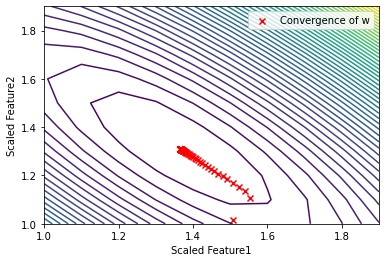

In [ ]:
#Implementation of gradient descent
cost = lambda a,b,w: np.linalg.norm((np.dot(a,w)-b))*(1/n)  #cost function

def gradient_descent (x, y, isplt, alpha, maxiter):
  # alpha = 0.5
  w = np.matrix(np.random.rand(3)).T
  J = [cost(x,y,w)]
  niter = 0

  #gradient descent iteration
  while True: 
    delJ = (np.dot((np.dot(x,w)-y).T,x).T)*(1/n)*alpha
    w = w - delJ
    J.append(cost(x,y,w))
    if (abs(min(delJ)[0,0]) < 1e-8) or niter > maxiter: break
    niter += 1
    if isplt: plt.scatter(w[1,0],w[2,0],c = 'r', marker = 'x')
  return w, J

w, J = gradient_descent(x, y, isplt = True, alpha = 0.5, maxiter = 100)
print("weight vector obtained by gradient descent=")
print(w,'\n')

#Estimation of the upper and lower limit of the bankloan
lb = w[0,0] + w[1,0]*feat_scaling(min(x_est[1]),1) + w[2,0]*feat_scaling(min(x_est[1]),2)
ub = w[0,0] + w[1,0]*feat_scaling(max(x_est[1]),1) + w[2,0]*feat_scaling(max(x_est[1]),2)
print("Lower bound of bank-loan in lakhs:", lb, "upper bound of bank-loan in lakhs:", ub,'\n')

#plot Cost funciton contours indicating convergence
w1 = np.arange(1, 2, 0.1)
w2 = np.arange(1, 2, 0.1)
ax1, ax2 = np.meshgrid(w1,w2)
z = np.ones((ax1.shape[0],ax1.shape[1]))
for i in range(ax1.shape[0]):
  for j in range(ax1.shape[1]):
    wgt = np.matrix([ax1[i,j], ax2[i,j]]).T
    z[i,j] = cost(x[:,1:],y,wgt)
plt.contour(ax1, ax2, z, 50)
plt.xlabel('Scaled Feature1')
plt.ylabel('Scaled Feature2')
plt.legend(['Convergence of w'])

**Task 2.2.c** Plot the flat prices as a function of flat size and number of bedrooms. Draw the least square estimators obtained respectively by solving the closed form solution and by gradient descent. Plot your least square estimations for the bank loan in both cases.

Text(0.5, 0.92, 'Regression Plane:: Estimation of bank loan marked')

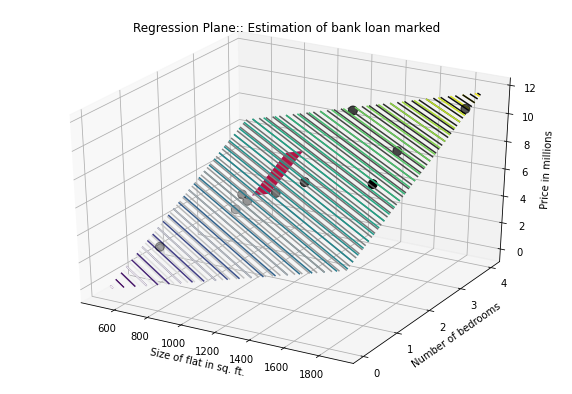

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x_raw[0], x_raw[1], y, color = "black", s = 80)

#plotting the regression planes
x1 = np.arange(min(x_raw[0])-100, max(x_raw[0])+100, ceil((max(x_raw[0]) - min(x_raw[0]))/100))
x2 = np.arange(min(x_raw[1])-1, max(x_raw[1])+1,)
plt.yticks(x2)

ax1, ax2 = np.meshgrid(x1,x2)
z = np.ones((ax1.shape[0],ax1.shape[1]))
z2 = np.ones((ax1.shape[0],ax1.shape[1]))
for i in range(ax1.shape[0]):
  for j in range(ax1.shape[1]):
    z[i,j] = w[0,0] + w[1,0]*feat_scaling(ax1[i,j],1) + w[2,0]*feat_scaling(ax2[i,j],2)
    z2[i,j] = w_cl[0,0] + w_cl[1,0]*feat_scaling(ax1[i,j],1) + w_cl[2,0]*feat_scaling(ax2[i,j],2)
ax.contour3D(ax1, ax2, z, 50)
ax.contour3D(ax1, ax2, z2, 100, cmap = 'binary')

#plotting least-square estimation for the bank loan:
x1 = np.arange(min(x_est[0]), max(x_est[0])+1, ceil((max(x_est[0]) - min(x_est[0]))/100))
x2 = np.arange(min(x_est[1]), max(x_est[1])+1, )
ax1, ax2 = np.meshgrid(x1,x2)
z = np.ones((ax1.shape[0],ax1.shape[1]))
z2 = np.ones((ax1.shape[0],ax1.shape[1]))
for i in range(ax1.shape[0]):
  for j in range(ax1.shape[1]):
    z[i,j] = w[0,0] + w[1,0]*feat_scaling(ax1[i,j],1) + w[2,0]*feat_scaling(ax2[i,j],2)
    z2[i,j] = w_cl[0,0] + w_cl[1,0]*feat_scaling(ax1[i,j],1) + w_cl[2,0]*feat_scaling(ax2[i,j],2)
ax.plot_surface(ax1, ax2, z, color = 'blue', label='first')
ax.plot_surface(ax1, ax2, z2, color = 'red')

#labels and legends:
ax.set_xlabel('Size of flat in sq. ft.')
ax.set_ylabel('Number of bedrooms')
ax.set_zlabel('Price in millions')

ax.set_title("Regression Plane:: Estimation of bank loan marked")

**Task 2.2.d** Download the Portland House Price Prediction Dataset https://www.kaggle.com/kennethjohn/housingprice. Report the 10-fold cross validation mean squared error of your least square estimation model trained by gradient descent.

In [ ]:
with open('ex1data2.txt', 'r') as f:
    inp = [[int(num) for num in line.split(',')] for line in f]
x2 = np.matrix(inp)
y2 = x2[:,2]/1e5

#For the bias add 1's at 1st column
x2 = np.hstack((np.ones((x2.shape[0],1)),np.delete(x2, 2, axis= 1)))

#Feature Scaling:
for i in range(1,x2.shape[1]):
  x2[:,i] = feat_scaling(x2[:,i], i)

#10-fold train_test split:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.1, random_state=42)

w2, J = gradient_descent(X_train, y_train, isplt = False, alpha = 0.001, maxiter = 5000)
mse = cost(X_test, y_test, w2)

print("The mean squared error in the trained model:")
print(mse)


The mean squared error in the trained model:
0.24203815663642933
